# Calling our workflow
Ensure that you've setup the trigger event for your main workflow to be a [webhook](https://docs.n8n.io/integrations/builtin/core-nodes/n8n-nodes-base.webhook/), and click "active". This automatically deploys your n8n workflow to become a REST API.

> If you click on your trigger node, you will find the production URL and testing URLs - the production URL is only usable after you click "active"

This is what your workload will look like when active

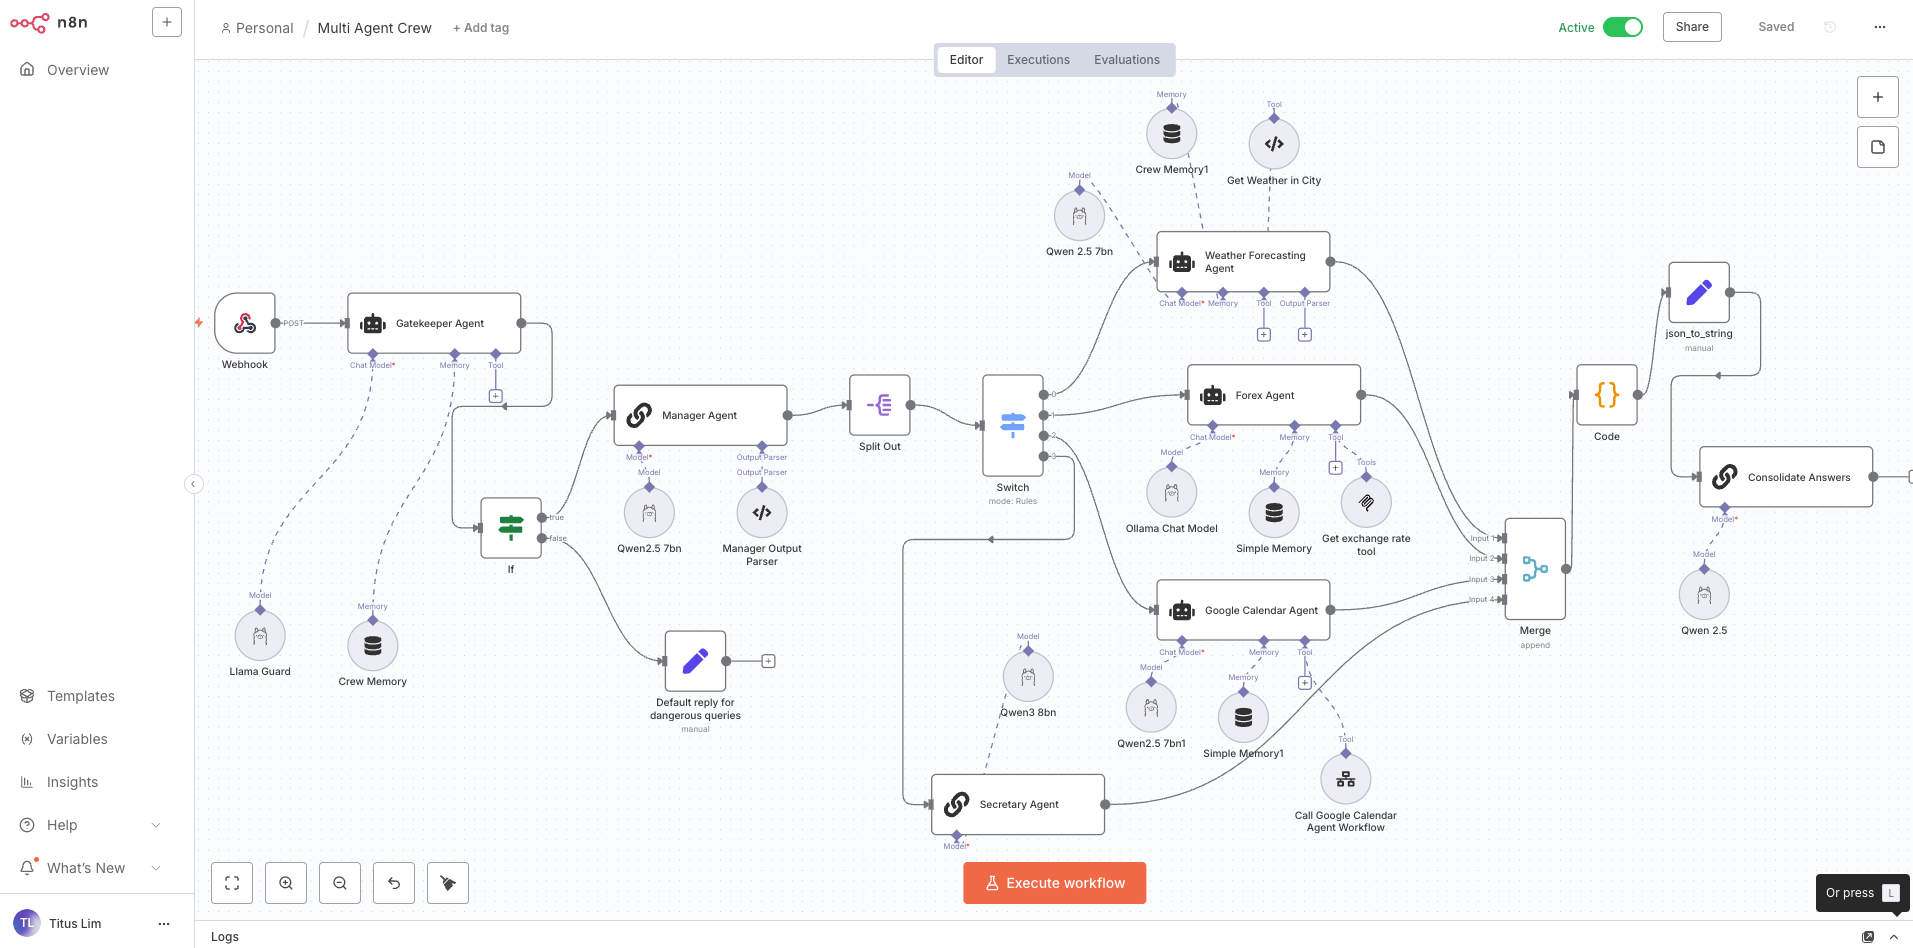

In [1]:
from IPython.display import display, Image

display(Image("../images/23. Activate Workflow.png"))

In [13]:
import requests

url = "http://localhost:5678/webhook-test/n8n"

## This is what happens when the webhook responds immediately.

In [5]:
payload = {
    "chatInput": "Hi! What is the current exchange rate from SGD to USD?",
}

# Send JSON with proper headers
response = requests.post(url, json=payload)

# Check the response
print("Status:", response.status_code)
print("Response:", response.text)

Status: 200
Response: {"message":"Workflow was started"}


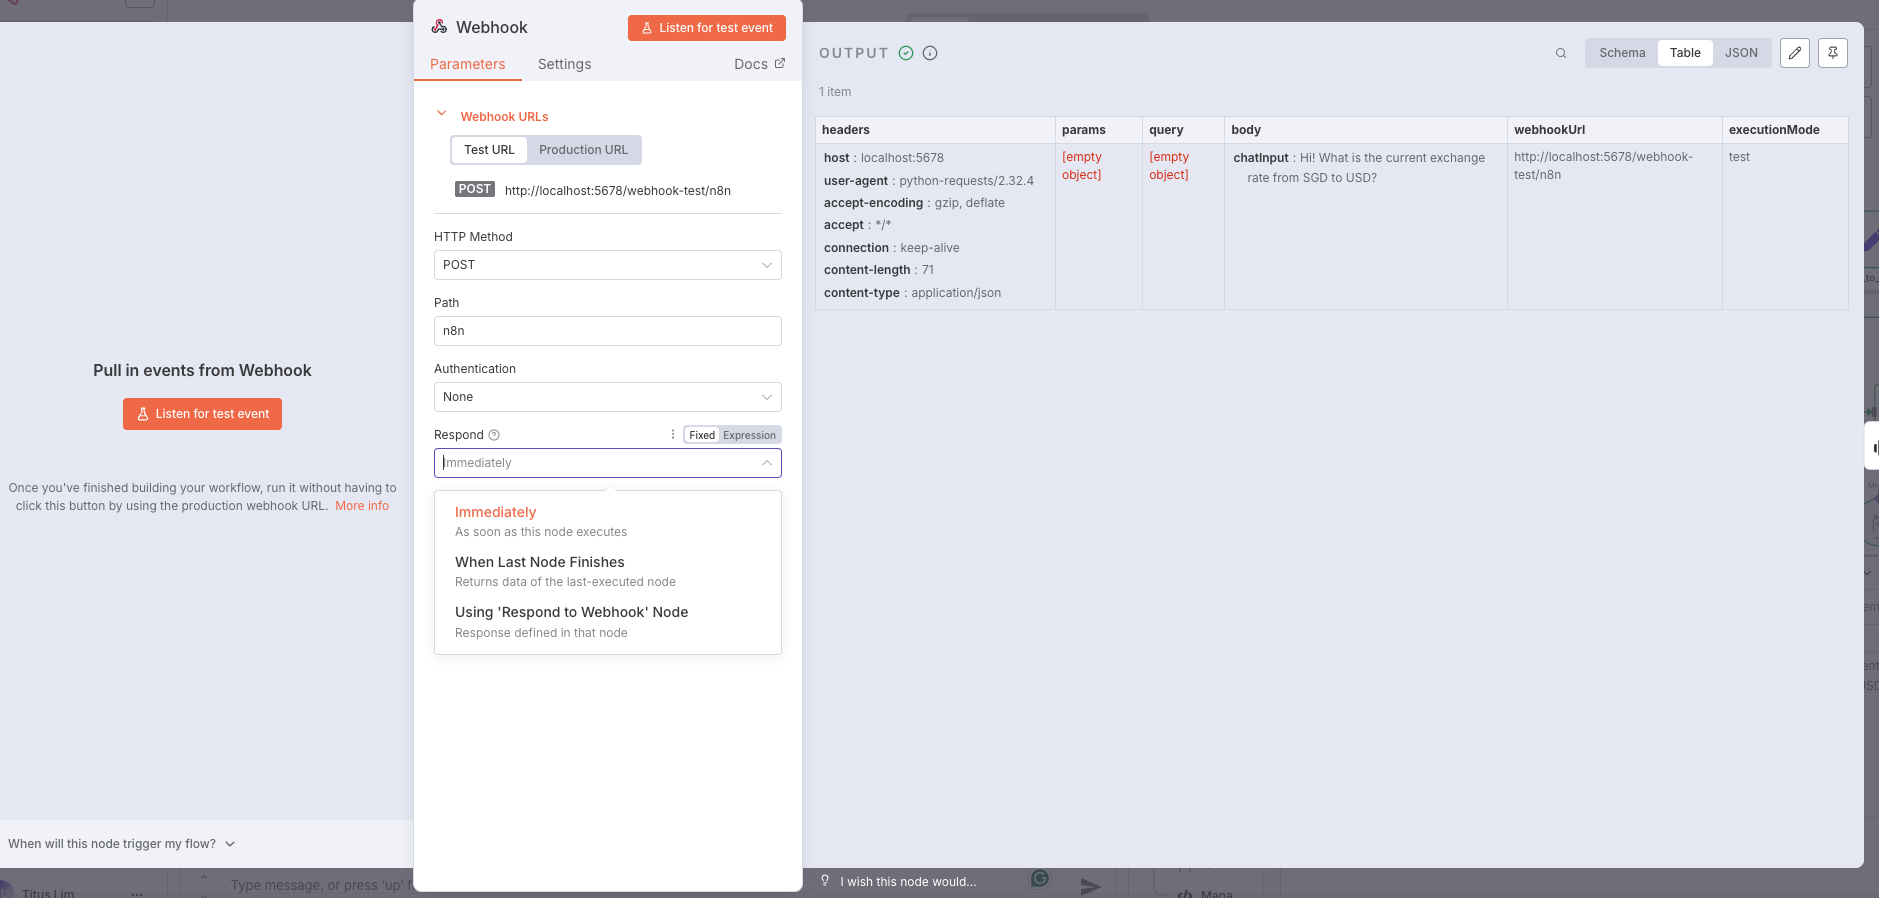

In [2]:
display(Image("../images/24. webhook_config.png"))

Clearly this is not the behavior that we want. Let's modify the respond field to "When Last Node Finishes"

## This is what happens when the webhook responds only after the last node has executed

The execution took less than 1 minute!

In [6]:
payload = {
    "chatInput": "Hi! What is the current exchange rate from SGD to USD?",
}

# Send JSON with proper headers
response = requests.post(url, json=payload)

# Check the response
print("Status:", response.status_code)
print("Response:", response.text)

Status: 200
Response: {"text":"The current exchange rate from Singapore Dollar (SGD) to US Dollar (USD) is approximately 1 SGD = 0.7804 USD as of July 22, 2025. Please note that currency rates can fluctuate and it's a good idea to check the latest rates for your specific needs."}


In [12]:
import json
from IPython.display import display, Markdown

display(Markdown(json.loads(response.text)['text']))

The current exchange rate from Singapore Dollar (SGD) to US Dollar (USD) is approximately 1 SGD = 0.7804 USD as of July 22, 2025. Please note that currency rates can fluctuate and it's a good idea to check the latest rates for your specific needs.